In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Linear Regression

### Contents
**Topics**
* Regression
    * Simple Regression
    * Multiple Regression
        * PCA
        
* Polynomial
    * Underfitting - Overfitting
    * Regularization
    
* Feature Scaling

**Coding**
* Scikit-learn
* Hands-on Implementation
    * Nomal Equation
    * Gradient Descent
* Pytorch

In [2]:
def load_dataset_fire_and_theft(path_datasets):
    with open(path_datasets) as f:
        lines = [line.strip().split('\t')for line in f]
    x = []
    y = []

    for i in range(1, len(lines)):
        x.append(list(map(float, lines[i][:-1])))
        y.append(float(lines[i][-1]))

    x = np.array(x)
    y = np.array(y)
    return x, y

def plot_result(x, y, y_, title='linear regressoin'):
    plt.figure()
    plt.plot(x, y, 'ro', label='Original data')
    plt.plot(x, y_, label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('scikit-learn')
    plt.show()

In [3]:
# dataset for simple regression
x, y = load_dataset_fire_and_theft('datasets/fire_and_theft.txt')

# dataset for multiple regression
# boston = datasets.load_boston()
# x = boston.data
# y = boston.target
# print(x.shape, y.shape)

## Scikit-learn

coefficient: 1.3134560049239135


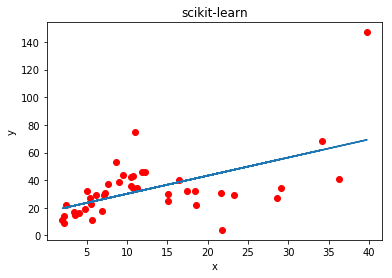

In [4]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x, y)
y_ = model.predict(x)

print('coefficient:', model.coef_[0])
plot_result(x, y, y_, title='scikit-learn')

## Normal Equation

Normal Equation is computationally expensive when you have a very large number of features ( n features ), because you will ultimately need to take the inverse of a n x n matrix in order to solve for the parameters data.
Compared to gradient descent:

it will be reasonably efficient and will do something acceptable when you have a very large number ( millions ) of features.
So if n is large then use gradient descent.

If n is relatively small ( on the order of a hundred ~ ten thousand ), then the normal equation

In [5]:
import numpy as np
#for inverse matrix
from numpy.linalg import inv

x_n = np.squeeze(x)
y_n = np.squeeze(y)

#f orm matrix x and Y
X = np.array([x_n]).T
Y = (y_n[:, np.newaxis])
#print(X.shape, Y.shape) (42, 1) (42, 1)

#apply normal equation
theta = inv(X.T.dot(X)).dot(X.T).dot(Y)

print(theta[0][0])#it return theta0=3 and theta1=1

2.1682978584887236


## Gradeint Descent
### 1. Numerical Analysis Method

In [6]:
# prerequisite
def numerical_gradient(f, weight):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(weight)
    
    for idx in range(weight.size):
        tmp_val = weight[idx]
        
        # f(x+h)
        weight[idx] = tmp_val + h
        fxh1 = f(weight) 
        
        # f(x-h)
        weight[idx] = tmp_val - h 
        fxh2 = f(weight) 
        grad[idx] = (fxh1 - fxh2) / (2*h)
        weight[idx] = tmp_val
        
    return grad

def numerical_diff(func, x):
    '''
    numerical differentiation
    '''
    h = 1e-4
    return (func(x+h) - func(x-h)) / (2*h)

# 0.01x^2 + 0.1x  
func1 = lambda x: 0.01 * (x**2) + 0.1 * x
dy = numerical_diff(func1, 5)
print(dy)

# x0^2 + x1^2
func2 = lambda x: (x[0]**2) +(x[1]**2) 
dy = numerical_gradient(func2, np.array([3.0, 4.0]))
print(dy)

0.1999999999990898
[6. 8.]


Epoch [40/400], Loss: 447.4378, Gradient: -166.7292, theta: [[0.863495]]
Epoch [80/400], Loss: 310.4150, Gradient: -100.3300, theta: [[1.38310698]]
Epoch [120/400], Loss: 260.7963, Gradient: -60.3740, theta: [[1.69578582]]
Epoch [160/400], Loss: 242.8280, Gradient: -36.3303, theta: [[1.88394171]]
Epoch [200/400], Loss: 236.3209, Gradient: -21.8620, theta: [[1.99716536]]
Epoch [240/400], Loss: 233.9643, Gradient: -13.1555, theta: [[2.0652982]]
Epoch [280/400], Loss: 233.1108, Gradient: -7.9164, theta: [[2.10629744]]
Epoch [320/400], Loss: 232.8016, Gradient: -4.7637, theta: [[2.13096892]]
Epoch [360/400], Loss: 232.6895, Gradient: -2.8666, theta: [[2.14581509]]
Epoch [400/400], Loss: 232.6489, Gradient: -1.7250, theta: [[2.15474884]]
coefficient: [[2.15474884]]


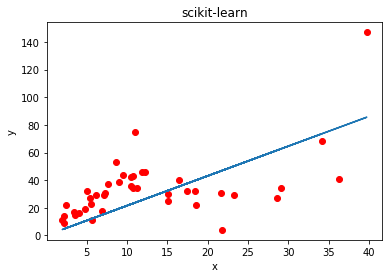

In [17]:
num_epochs = 400
learning_rate = 0.0001

theta = np.zeros((1, 1))
m = len(x)

def regression(theta):
    h = np.matmul(x, theta) 
    error = h - y[:, np.newaxis]
    loss = error.T.dot(error)/(2*m)
    return loss

for epoch in range(num_epochs):
    grad = numerical_gradient(regression, theta)
    gradient = numerical_gradient(regression, theta)
    theta = theta - learning_rate * gradient
    if (epoch+1) % 40 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}, Gradient: {:.4f}, theta: {}'.\
               format(epoch+1, num_epochs, regression(theta)[0][0], gradient[0][0], theta))
print('coefficient:', theta)
y_ = np.matmul(x, theta) 
plot_result(x, y, y_, title='gradient descent')

### 2. Differentiation Method

Epoch [20/200], Loss: 262.4125, Gradient: -122.6101, theta: [[1.71920267]]
Epoch [40/200], Loss: 233.9036, Gradient: -25.3949, theta: [[2.07528182]]
Epoch [60/200], Loss: 232.6806, Gradient: -5.2598, theta: [[2.14903249]]
Epoch [80/200], Loss: 232.6281, Gradient: -1.0894, theta: [[2.16430764]]
Epoch [100/200], Loss: 232.6259, Gradient: -0.2256, theta: [[2.16747141]]
Epoch [120/200], Loss: 232.6258, Gradient: -0.0467, theta: [[2.16812669]]
Epoch [140/200], Loss: 232.6258, Gradient: -0.0097, theta: [[2.16826241]]
Epoch [160/200], Loss: 232.6258, Gradient: -0.0020, theta: [[2.16829052]]
Epoch [180/200], Loss: 232.6258, Gradient: -0.0004, theta: [[2.16829634]]
Epoch [200/200], Loss: 232.6258, Gradient: -0.0001, theta: [[2.16829754]]
coefficient: [[2.16829754]]


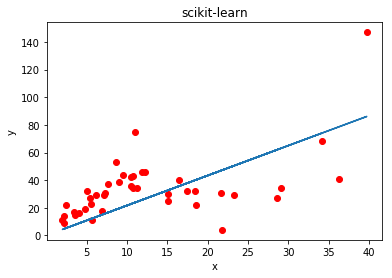

In [19]:
# hyper-parameter for training
num_epochs = 200
learning_rate = 0.0003

theta = np.zeros((1, 1))

m = len(x)

for epoch in range(num_epochs):
    h = np.matmul(x, theta) 
    error = h - y[:, np.newaxis]
    loss = error.T.dot(error)/ (2 * m)
    gradient =  x.T.dot(error) / m
    theta = theta - learning_rate * gradient
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}, Gradient: {:.4f}, theta: {}'\
               .format(epoch+1, num_epochs, loss[0][0],  gradient[0][0], theta))


print('coefficient:', theta)
y_ = np.matmul(x, theta) 
plot_result(x, y, y_, title='gradient descent')

Text(2.271717171717172, 262.62723404074416, '232.62723404074413')

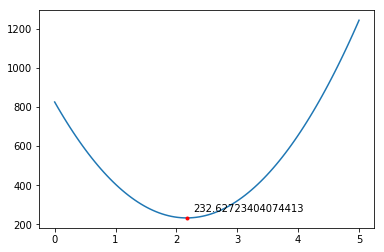

In [27]:
# enumerate weights
theta_list = np.linspace(0,5, 100)
loss_list = []
for theta in theta_list:  
    h = np.matmul(x, np.array([[theta]]))
    error = h - y[:, np.newaxis]
    loss = error.T.dot(error)/ (2 * m) 
    loss_list.append(loss[0][0])
    
# plot
loc, val = np.argmin(loss_list), np.min(loss_list)
fig = plt.figure()
plt.plot(theta_list, loss_list)
plt.plot([theta_list[loc]], [val], marker='o', markersize=3, color="red")
plt.text(theta_list[loc]+0.1, val+30, str(val))

## Pytorch

Epoch [20/200], Loss: 603.4838, Gradient: -373.5375
Epoch [40/200], Loss: 482.6682, Gradient: -132.5906
Epoch [60/200], Loss: 467.4460, Gradient: -47.0644
Epoch [80/200], Loss: 465.5280, Gradient: -16.7059
Epoch [100/200], Loss: 465.2863, Gradient: -5.9298
Epoch [120/200], Loss: 465.2559, Gradient: -2.1047
Epoch [140/200], Loss: 465.2521, Gradient: -0.7470
Epoch [160/200], Loss: 465.2516, Gradient: -0.2651
Epoch [180/200], Loss: 465.2515, Gradient: -0.0939
Epoch [200/200], Loss: 465.2515, Gradient: -0.0335
coefficient: 2.1682348251342773


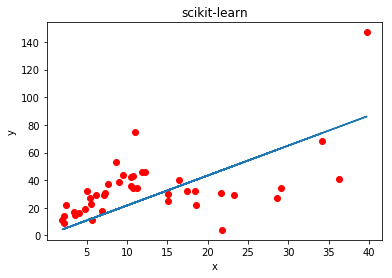

In [28]:
import torch
import torch.nn as nn

# hyper-parameter for training
num_epochs = 200
learning_rate = 0.0001

# Linear regression model
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size, bias=False)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.FloatTensor(x)
    targets = torch.FloatTensor(y)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets.unsqueeze(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}, Gradient: {:.4f}'.\
               format(epoch+1, num_epochs, loss.item(), model.weight.grad.item()))

# Plot the graph
y_ = model(torch.FloatTensor(x)).detach().numpy()
print('coefficient:', model.weight.detach().item())
plot_result(x, y, y_, title='pytorch')